## Importation of Necessary Modules

In [ ]:
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources from NLTK
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

## Loading Data in DataFrame

In [341]:
train_data = pd.read_csv("Datasets/train.csv")

## Visualizing Data

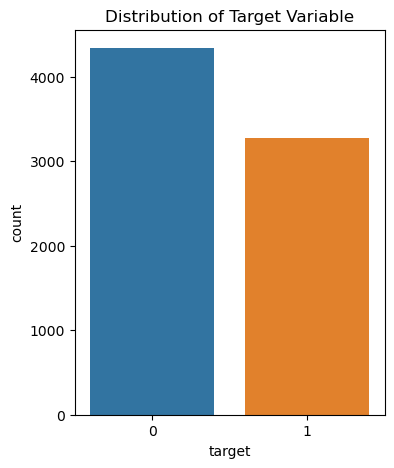

In [342]:
plt.figure(figsize=(4, 5))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()

## Preprocessing of Data

In [ ]:
train_data["text"] = train_data["text"].str.lower()
train_data["text"].sample(5, random_state=42)

In [344]:
def preprocess_tweet_text(tweet):
    # Remove URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)

    # Remove mentions and hashtags
    tweet = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9_]+', '', tweet)

    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = tweet.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the preprocessed tokens back into a single string
    processed_tweet = ' '.join(tokens)

    return processed_tweet

In [ ]:
train_data["text"] = train_data["text"].apply(preprocess_tweet_text)
train_data.head()

## Transformation of Data

In [346]:
# Training and Testing
X = train_data['text']
y = train_data['target']


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transforming test data
X_test_tfidf = vectorizer.transform(X_test)

## Initializing and Fitting Model Using LogisticRegression and Visualizing Metrics

In [347]:
#Logistics Regression
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train_tfidf, y_train)

# Making predictions on the test set
log_predictions = log_model.predict(X_test_tfidf)

In [348]:
log_accuracy = accuracy_score(y_test, log_predictions)
log_precision = precision_score(y_test, log_predictions)
log_recall = recall_score(y_test, log_predictions)
log_f1_score = f1_score(y_test, log_predictions)
print("Accuracy (LogisticRegression):", log_accuracy)
print("Precision (LogisticRegression):", log_precision)
print("Recall (LogisticRegression):", log_recall)
print("f1_score (LogisticRegression):", log_f1_score)

Accuracy (LogisticRegression): 0.7977675640183848
Precision (LogisticRegression): 0.8235294117647058
Recall (LogisticRegression): 0.6687211093990755
f1_score (LogisticRegression): 0.7380952380952381


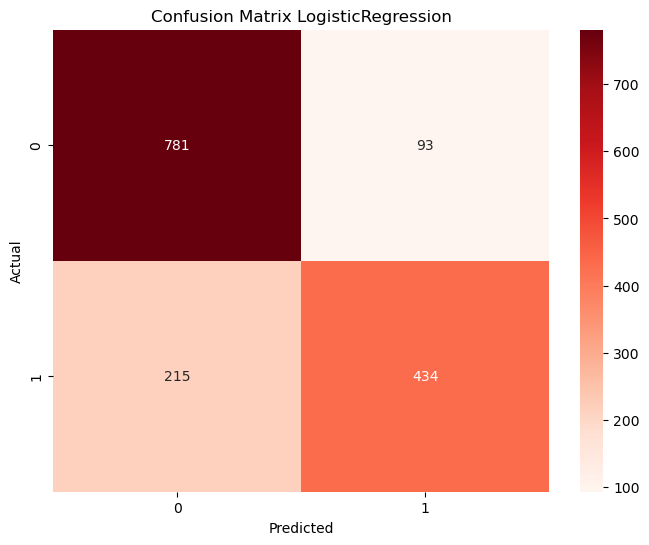

In [349]:
# Confusion Matrix for LogisticRegression
cm = confusion_matrix(y_test, log_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Intializing and Fitting Data Using SVC and Visualizing Metrics

In [350]:
# Initialize the SVC model
model = SVC()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svc_predictions = model.predict(X_test_tfidf)

In [351]:
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1_score = f1_score(y_test, svc_predictions)
print("Accuracy (SVC):", svc_accuracy)
print("Precision (SVC):", svc_precision)
print("Recall (SVC):", svc_recall)
print("f1_score (SVC):", svc_f1_score)

Accuracy (SVC): 0.7951411687458962
Precision (SVC): 0.831041257367387
Recall (SVC): 0.6517719568567026
f1_score (SVC): 0.7305699481865284


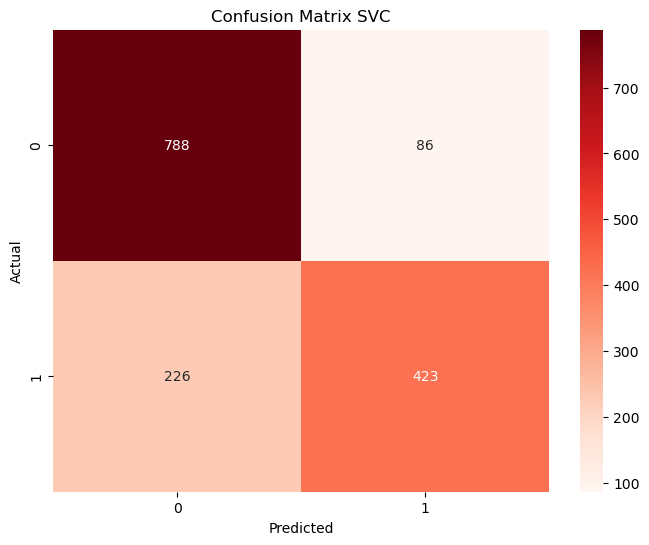

In [352]:
# Confusion Matrix for SVC
cm = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Intializing and Fitting Data Using MultinomialNB and Visualizing Metrics

In [353]:
# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
mnb_predictions = model.predict(X_test_tfidf)

In [354]:
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions)
mnb_recall = recall_score(y_test, mnb_predictions)
mnb_f1_score = f1_score(y_test, mnb_predictions)
print("Accuracy (MultinomialNB):", mnb_accuracy)
print("Precision (MultinomialNB):", mnb_precision)
print("Recall (MultinomialNB):", mnb_recall)
print("f1_score (MultinomialNB):", mnb_f1_score)

Accuracy (MultinomialNB): 0.7951411687458962
Precision (MultinomialNB): 0.831041257367387
Recall (MultinomialNB): 0.6517719568567026
f1_score (MultinomialNB): 0.7305699481865284


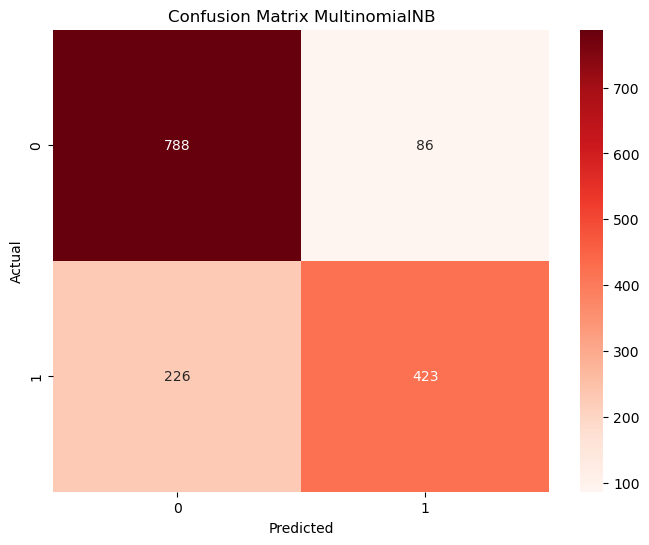

In [355]:
# Confusion Matrix for MultinomialNB
cm = confusion_matrix(y_test, mnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## Final Submission Using LogisticRegression

In [357]:
test_data = pd.read_csv("Datasets/test.csv")

In [ ]:
test_data["text"] = test_data["text"].apply(preprocess_tweet_text)
test_data.head()

In [363]:
X = test_data['text']
X = vectorizer.transform(X)

In [368]:
submission_predictions = log_model.predict(X)
submission_csv = pd.DataFrame({"id": test_data.id, "target": submission_predictions}).to_csv("submission.csv", index=False)